Tasks to Perform:
Obtain sales data files in various formats, such as CSV, Excel, and JSON.
1. Load the sales data from each file format into the appropriate data structures or
dataframes.
2. Explore the structure and content of the loaded data, identifying any inconsistencies,
missing values, or data quality issues.
3. Perform data cleaning operations, such as handling missing values, removing
duplicates, or correcting inconsistencies.
4. Convert the data into a unified format, such as a common dataframe or data structure,
to enable seamless analysis.
5. Perform data transformation tasks, such as merging multiple datasets, splitting
columns, or deriving new variables.
6. Analyze the sales data by performing descriptive statistics, aggregating data by
specific variables, or calculating metrics such as total sales, average order value, or
product category distribution.
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales
data and gain insights into sales trends, customer behavior, or product performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [17]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y', errors='coerce')

df = df.dropna(subset=['invoice_date'])

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()


Number of duplicate rows: 0


In [18]:
df['total_price'] = df['quantity'] * df['price']

df['month'] = df['invoice_date'].dt.month
df['day_of_week'] = df['invoice_date'].dt.day_name()

In [19]:
total_sales = df['total_price'].sum()
print(f"\nTotal sales: {total_sales:.2f}")

average_order_value = df['total_price'].mean()
print(f"Average order value: {average_order_value:.2f}")


Total sales: 251505794.25
Average order value: 2528.79


In [31]:
sales_by_category = df.groupby('category')['total_price'].mean()
sales_by_category

category
Books                167.547260
Clothing            3305.500364
Cosmetics            449.947864
Food & Beverage       57.494251
Shoes               6632.793649
Souvenir             127.190368
Technology         11581.735388
Toys                 394.609521
Name: total_price, dtype: float64

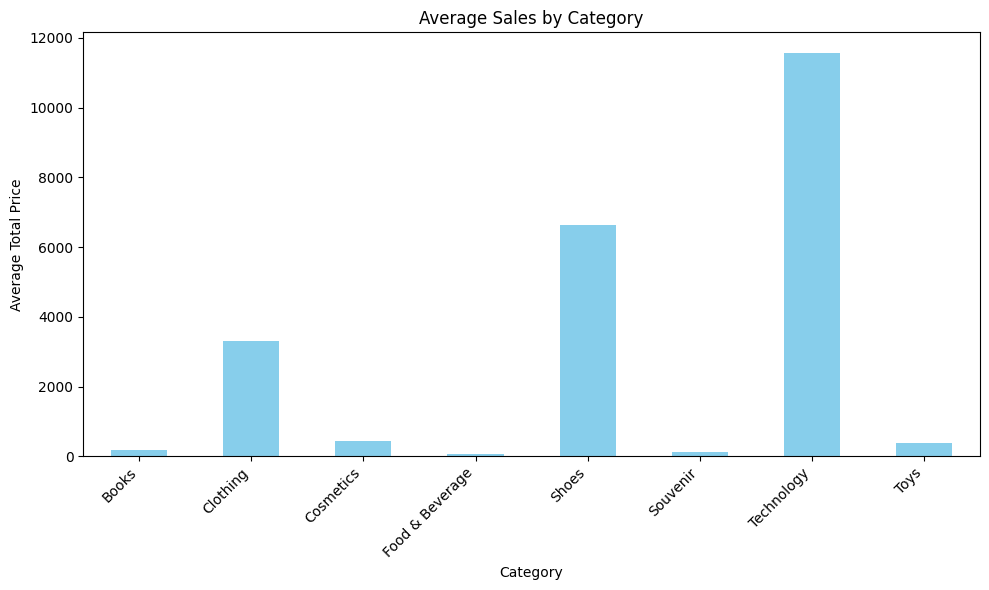

In [32]:
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Total Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

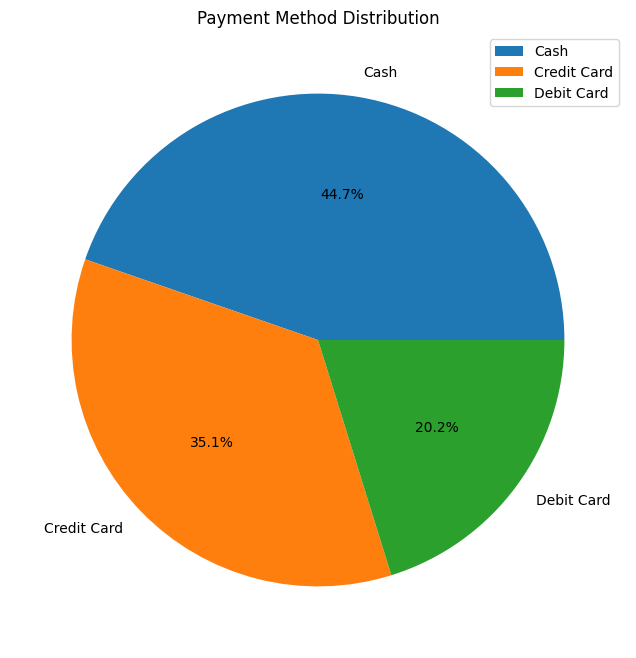

In [33]:
plt.figure(figsize=(8, 8))
df['payment_method'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), legend=True)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()